In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.drop(["User ID"], axis=1,inplace=True)

In [7]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Replace Gender as Male=1 and Female=0

In [9]:
data = data.replace("Male", 1)
data = data.replace("Female", 0)

In [10]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


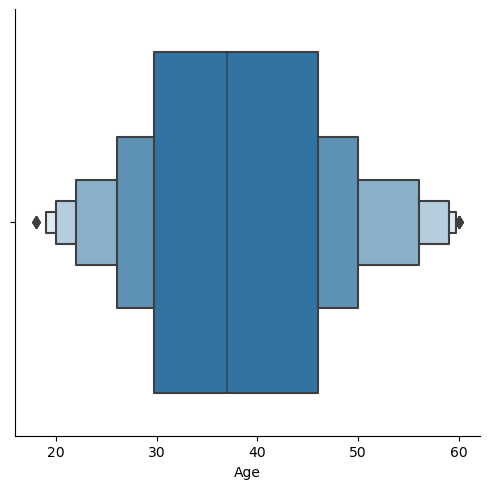

In [11]:
sns.catplot(x="Age",kind="boxen",data=data)   ##box graph
plt.show()

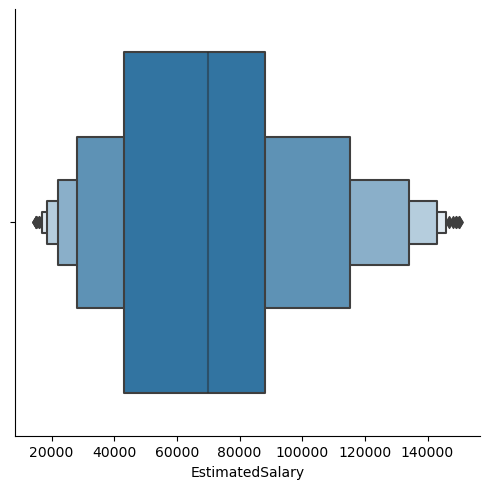

In [12]:
sns.catplot(x="EstimatedSalary",kind="boxen",data=data)   ##box graph
plt.show()

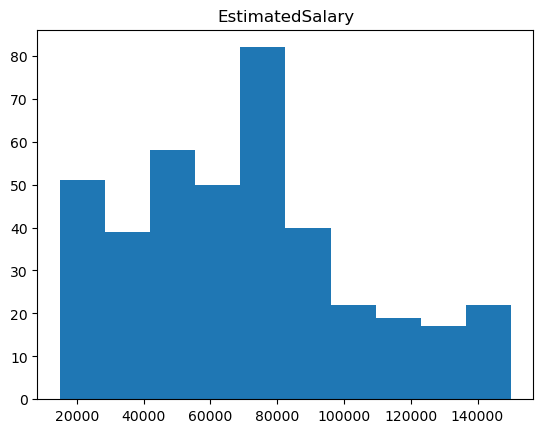

In [13]:
data.hist(column ='EstimatedSalary',grid=False)
plt.show()

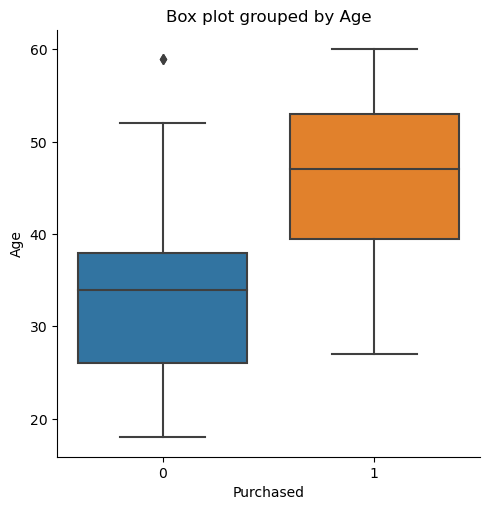

In [14]:
sns.catplot(x="Purchased",y="Age",kind="box",data=data)   
plt.title("Box plot grouped by Age")
plt.show()

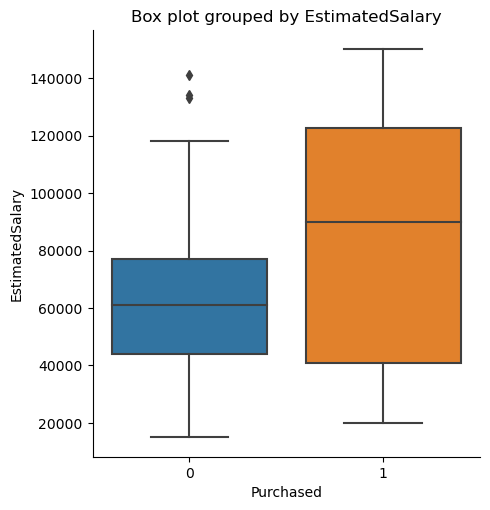

In [15]:
sns.catplot(x="Purchased",y="EstimatedSalary",kind="box",data=data)   
plt.title("Box plot grouped by EstimatedSalary")
plt.show()

In [16]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [17]:
X=data[["Gender","Age","EstimatedSalary"]].values

In [18]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [19]:
Y=data['Purchased']

In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## train_test_split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier()

In [25]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [26]:
y_predict = model.predict(X_test)

In [27]:
y_predict

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
data_new = pd.DataFrame({'Actual':Y_test,'Predicted':y_predict})

In [29]:
data_new

,Actual,Predicted
316,1,1
368,0,0
119,0,0
165,0,0
21,1,1
...,...,...
195,0,0
105,0,0
2,0,0
257,0,0


## Plot decision tree

In [30]:
from sklearn import tree

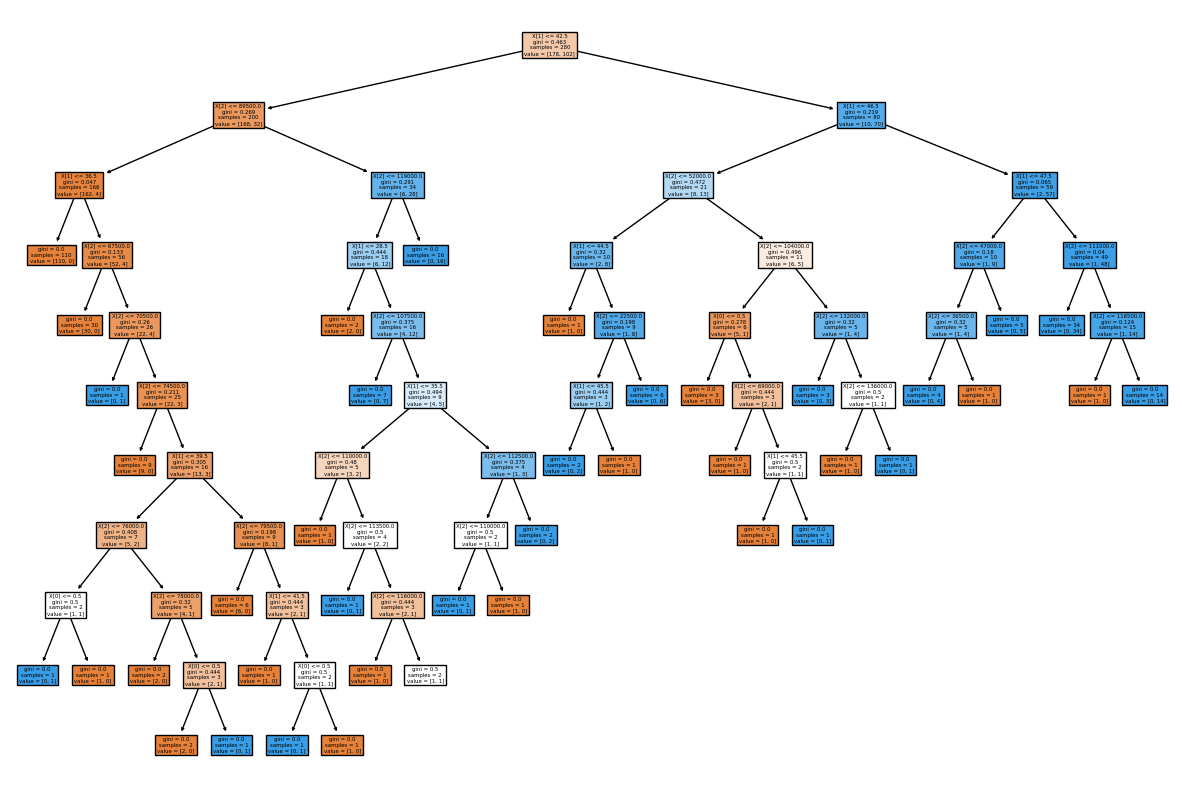

In [31]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [32]:
model1=DecisionTreeClassifier(max_depth=5)   ##if i want to set depth

In [33]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

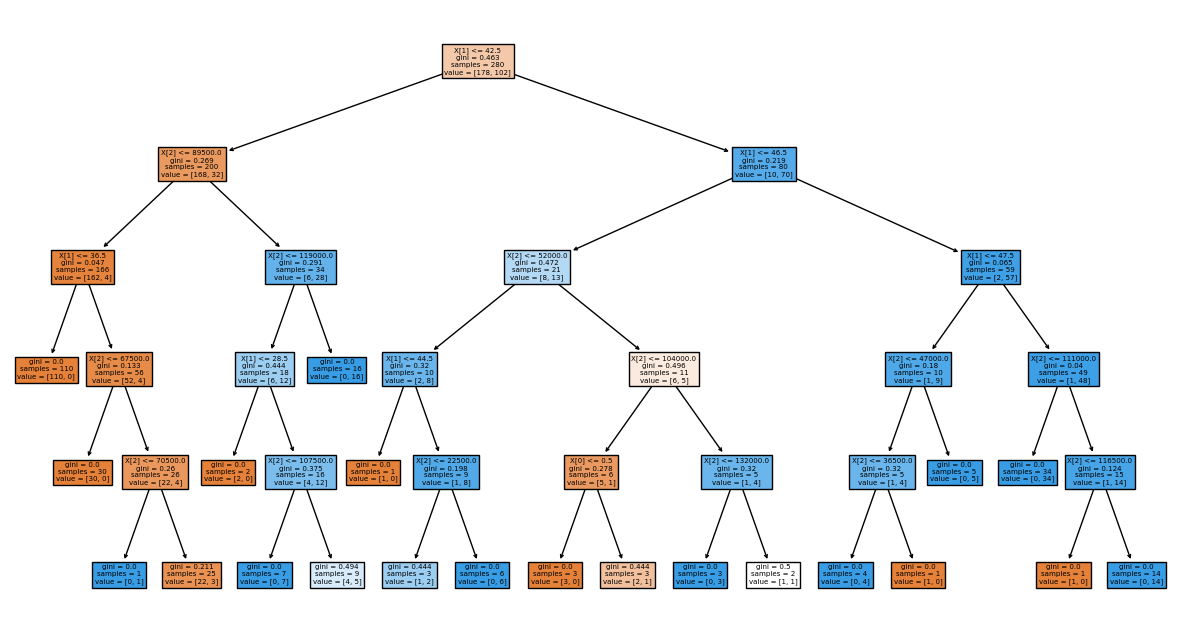

In [34]:
plt.figure(figsize=(15,8))
tree.plot_tree(model1,filled=True)
plt.show()

## Accuracy using decision tree classifier

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy =accuracy_score(Y_test,y_predict)*100

In [37]:
accuracy

87.5

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
performance = confusion_matrix(Y_test,y_predict)

In [40]:
performance

array([[70,  9],
       [ 6, 35]], dtype=int64)

In [41]:
from sklearn.metrics import plot_confusion_matrix

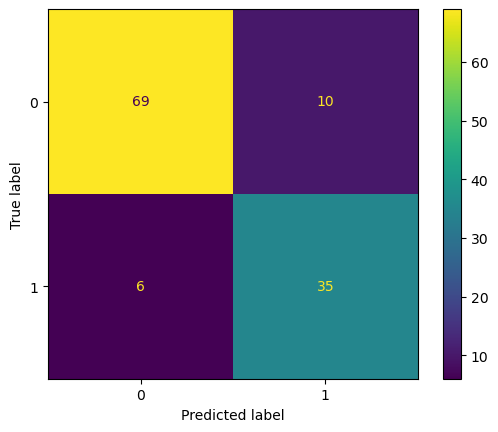

In [42]:
plot_confusion_matrix(model1,X_test,Y_test)
plt.show()

In [43]:
from sklearn.metrics import classification_report

In [44]:
report =classification_report(Y_test,y_predict)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        79
           1       0.80      0.85      0.82        41

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.86       120
weighted avg       0.88      0.88      0.88       120



In [46]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [47]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

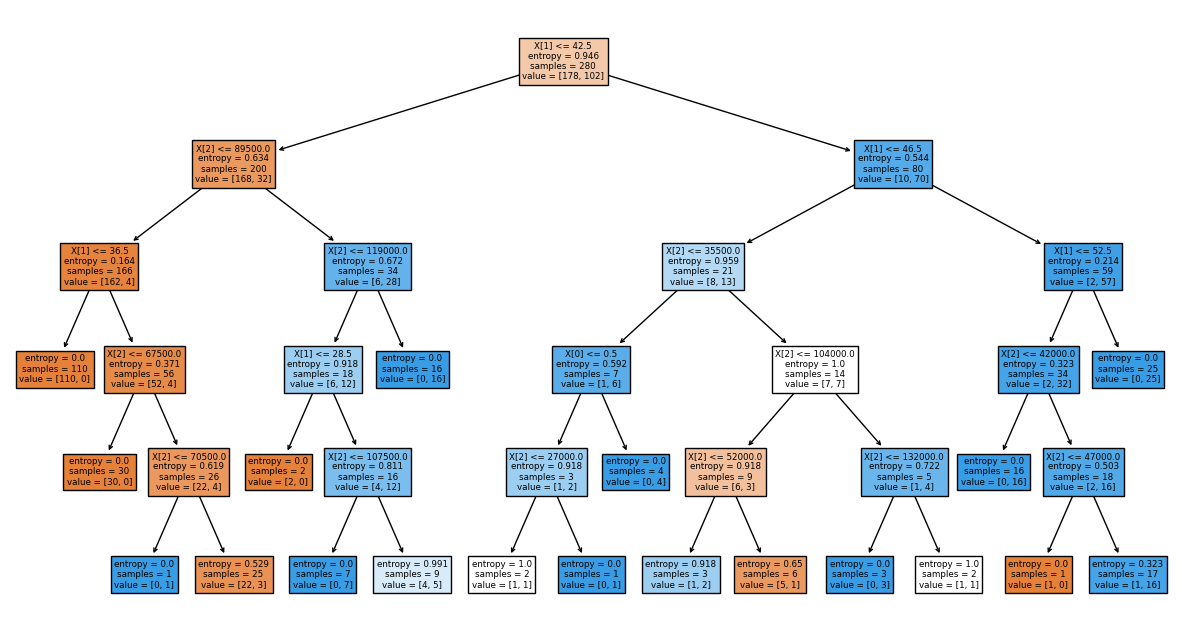

In [48]:
plt.figure(figsize=(15,8))
tree.plot_tree(model1,filled=True)
plt.show()

## LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model=LogisticRegression()

In [51]:
model.fit(X,Y)

LogisticRegression()

In [52]:
model.predict([[1,19,19000]])

array([0], dtype=int64)

In [53]:
model.score(X,Y)*100 

64.25

## Split data model

In [54]:
model.fit(X_train,Y_train)

LogisticRegression()

In [55]:
y_pred=model.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
model.predict([[1,19,19000]])

array([0], dtype=int64)

In [58]:
model.score(X_train,Y_train)*100

63.57142857142857

In [59]:
model.score(X_test,Y_test)*100

65.83333333333333

## Accuracy using logistic regression

In [60]:
accuracy_score(Y_test, y_pred)*100

65.83333333333333

In [61]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120

